In [138]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_name = "menu.csv"

df = pd.read_csv(file_name)
df_numerico = pd.read_csv(file_name)

#deixando apenas colunas numericas

df_numerico.drop(["Category", "Item", "Serving Size"], axis = 1, inplace = True)

#criando o label do gráfico final

y = df[['Category']]

df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [139]:
#matriz de correlação, autovalores e autovetores

matriz_correlacao = df_numerico.corr()
values,vectors = eig(matriz_correlacao)
indice_ordem_values = values.argsort()
print(matriz_correlacao)


                               Calories  Calories from Fat  Total Fat  \
Calories                       1.000000           0.904588   0.904409   
Calories from Fat              0.904588           1.000000   0.999663   
Total Fat                      0.904409           0.999663   1.000000   
Total Fat (% Daily Value)      0.904123           0.999725   0.999765   
Saturated Fat                  0.845564           0.847008   0.846707   
Saturated Fat (% Daily Value)  0.847631           0.849592   0.849293   
Trans Fat                      0.522441           0.433686   0.431453   
Cholesterol                    0.596399           0.682161   0.680547   
Cholesterol (% Daily Value)    0.595208           0.681607   0.680000   
Sodium                         0.712309           0.846624   0.846158   
Sodium (% Daily Value)         0.713415           0.847276   0.846780   
Carbohydrates                  0.781539           0.461672   0.461213   
Carbohydrates (% Daily Value)  0.781242           0

In [140]:
#normalizando o data numerico

x_std = StandardScaler().fit_transform(df_numerico)

#projetando valores no eixo x e y

projected_x = x_std.dot(vectors.T[indice_ordem_values[20]])

projected_y = x_std.dot(vectors.T[indice_ordem_values[19]])


C:\Users\amand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [141]:
#data frame com pca1 e pca2

result =pd.DataFrame(projected_x, columns = ['PC1'])
result['PC2'] = projected_y
result['Category'] = y

result.head()

,PC1,PC2,Category
0,1.757486,-2.303469,Breakfast
1,-0.212560,-1.947947,Breakfast
2,1.420793,-1.740293,Breakfast
3,3.692943,-2.066588,Breakfast
4,1.750009,-1.835332,Breakfast


Text(0.5, 1.0, 'PCA result')

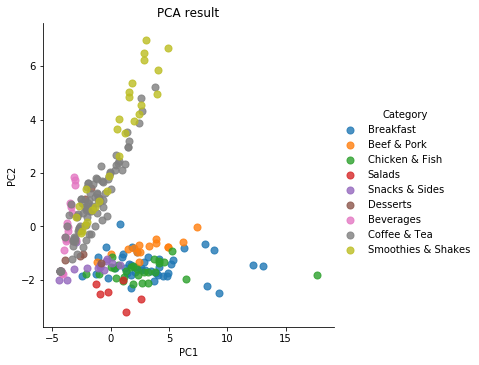

In [142]:
#plotando o gráfico

sns.lmplot('PC1', 'PC2', data=result, fit_reg=False,
           scatter_kws={"s": 50}, 
           hue="Category")

plt.title('PCA result')


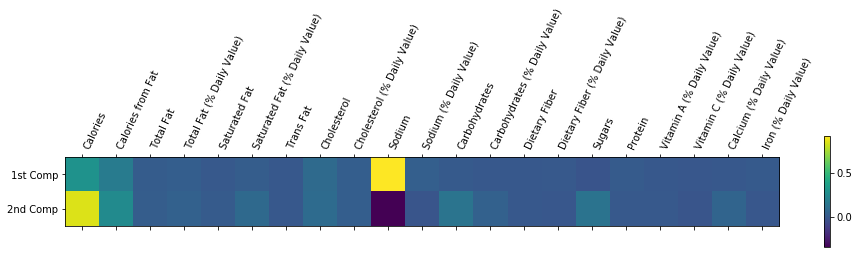

In [152]:
from numpy import array
from sklearn.decomposition import PCA
pca = PCA(2)
B= pca.fit(df_numerico)


plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(21),df_numerico,rotation=65,ha='left')
plt.savefig('fig.png',bbox_inches='tight')
plt.show()


In [154]:
pca.explained_variance_

array([382882.34711867,  30005.19882831])

In [ ]:
#ordem_values2 = np.sort(values)

#B = select(ordem_values[:9], ordem_vectors[:9])

#maior_autovetor = w[:,ordem[-1]]
#segundo_maior_autovetor = w[:,ordem[-2]]
#wpca = np.array([maior_autovetor, segundo_maior_autovetor])